In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# STRATEGY SET UP
txCost = 0
ts = pd.read_csv('data/WallSt-hourly-all.txt', index_col=0, parse_dates=[[0, 1]], dayfirst=True )
ts = ts["2016-07-06":]

import pytz
ts.index = ts.index.tz_localize(pytz.timezone('UTC'), ambiguous='NaT').tz_convert('EST').tz_localize(None)

# Resample into hourly data
#order = ts.columns
#ts = ts.resample('5min').agg({'Open': 'first', 'High': 'max', 'Low': 'min','Close': 'last'})[order]


# Remove hours we are not interested in
#ts[(ts.index.hour > 19) | (ts.index.hour < 12)] = np.nan

# Resample into Business Days
#ts = ts.resample('5min').agg({'Open': 'first', 'High': 'max', 'Low': 'min','Close': 'last'})[order]
#ts

In [2]:
!ls ../..
!pip install --upgrade ../../tradeframework

#import tradeframework
from tradeframework.api import Derivative, Portfolio, Optimizer, Model, TradeEnvironment, TradeEngine, AssetInfo
from tradeframework.environments import SandboxEnvironment, SandboxContext, ZiplineEnvironment
from tradeframework.models import PreOpenMomentum

fintools  mypkgs.pth  tradeframework
Processing /home/cwilkin/Cloud/Dropbox/Python/mypkgs/tradeframework
  Found existing installation: tradeframework 1.0.0
    Uninstalling tradeframework-1.0.0:
      Successfully uninstalled tradeframework-1.0.0
  Running setup.py install for tradeframework ... - \ | done


In [69]:
env = SandboxEnvironment("TradeFair")
context = {}

opt = env.createOptimizer("KellyOptimizer", "KellyOpt", opts={"window":20*24})
#opt = env.createOptimizer("EqualWeightsOptimizer", "EqualWeights")
p = env.createPortfolio("MyPortfolio", optimizer=opt)

p.addModel(env.createModel( "PreOpenMomentum", "D1-PreOpenMomentum" ))
p.addModel(env.createModel( "BuyAndHold", "D2-BuyAndHold" ))
#p.addModel(env.createModel( "BuyAndHold", "D3-BuyAndHold" ))
threshold = 0
p.addModel(env.createModel( "MarketInsightsModel", "D3-FinalHourML1", args=('cred/MIOapi_cred.json', 'DOW', '0aaf64aa-95bc-476b-9ac0-28891e40892a', threshold)))
p.addModel(env.createModel( "MarketInsightsModel", "D3-FinalHourML2", args=('cred/MIOapi_cred.json', 'DOW', 'a80a294f-12f8-4b27-8eac-9aad9a53ec8b', threshold)))
p.addModel(env.createModel( "MarketInsightsModel", "D3-FinalHourML3", args=('cred/MIOapi_cred.json', 'DOW', '28da8212-32f3-4680-bacd-0cd1c51bfe02', threshold)))
p.addModel(env.createModel( "MarketInsightsModel", "D3-FinalHourML4", args=('cred/MIOapi_cred.json', 'DOW', '53ca0624-21e4-48d4-b2b8-cee5b381ff2b', threshold)))
p.addModel(env.createModel( "MarketInsightsModel", "D3-FinalHourML5", args=('cred/MIOapi_cred.json', 'DOW', '6682f56b-a2e4-4e6d-92c5-9c11913f8b35', threshold)))
p.addModel(env.createModel( "MarketInsightsModel", "D3-FinalHourML6", args=('cred/MIOapi_cred.json', 'DOW', 'fdbe5895-0327-49d9-83e9-2246dbe1858b', threshold)))

# Feed data into the portfolio

#for index in range(0, len(ts)):
#env.handleData(0, ts[:index+1])
dInfo = env.handleData(context, AssetInfo("DOW", ts))

#env.placeOrders(context, allocations, ts)


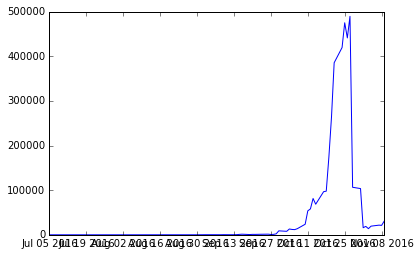

In [70]:
from tradeframework.api import TradeEngine
pReturns = TradeEngine.getPeriodReturns(dInfo.returns) 
pReturns.index = pReturns.index.tz_localize(pytz.timezone('UTC'))
                                            
ret = pReturns + 1
#ret = ret.prod(axis=1)

pnl = np.cumprod(ret.resample('B').agg('prod'))

plt.plot(pnl)
plt.show() 

#np.exp(np.log(ret).resample('B').agg({'Sandbox Engine': 'sum'}))-1

Entire data start date: 2016-07-05
Entire data end date: 2016-11-09
Backtest months: 102


,Backtest
Annual return,236.2%
Cumulative returns,3078531.2%
Annual volatility,154.1%
Sharpe ratio,1.45
Calmar ratio,2.42
Stability,0.94
Max drawdown,-97.5%
Omega ratio,1.93
Sortino ratio,3.52
Skew,6.44


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,97.52,2016-10-28,2016-11-04,NaT,NaN
1,65.18,2016-09-19,2016-09-20,2016-09-27,7
2,61.63,2016-09-27,2016-09-28,2016-09-29,3
3,59.52,2016-08-23,2016-08-26,2016-08-30,6
4,46.51,2016-10-04,2016-10-04,2016-10-04,1


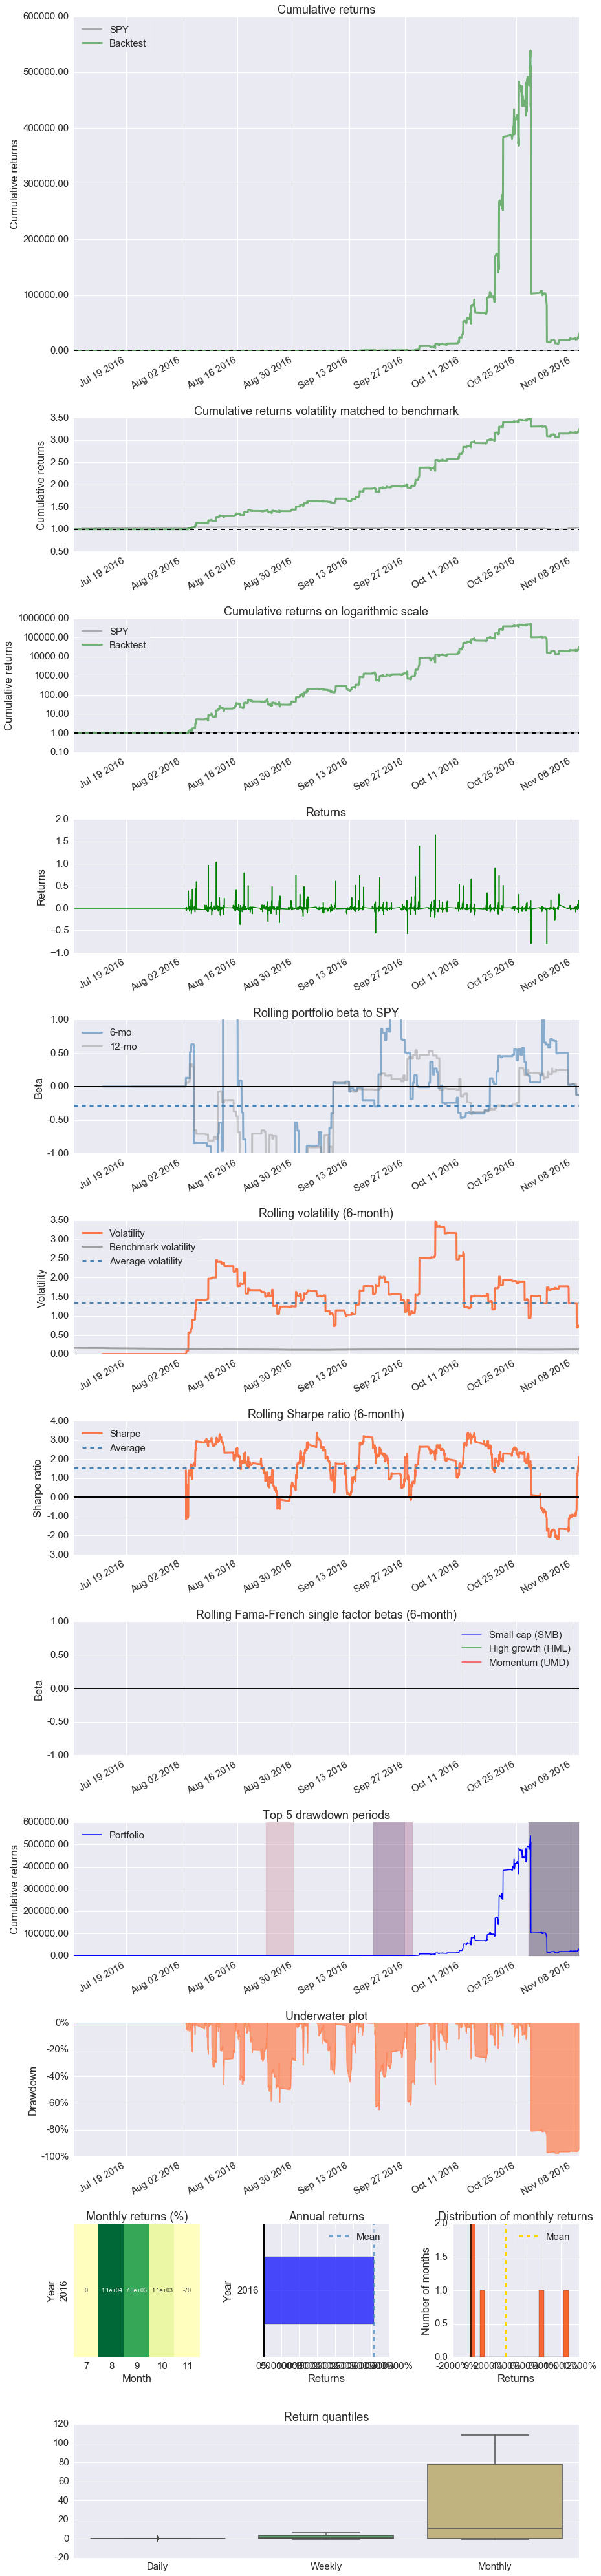

In [71]:
#!pip install --upgrade ../../empyrical/empyrical
import pyfolio as pf
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')

pf.create_returns_tear_sheet(pReturns)

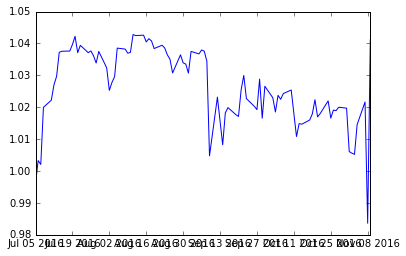

In [46]:
a = np.diff(ts["Open"].values) / ts["Open"][:-1]
a = a + 1
pnl = np.cumprod(a.resample('B').agg('prod'))
plt.plot(pnl)
plt.show() 

